In [38]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
seattle_df = pd.read_csv("Datasets/Seattle_Rescue_Plan.csv")

In [40]:
print(seattle_df.shape)

print(seattle_df.columns)

(86, 13)
Index(['Program ID', 'Dept (Full Name)', 'Dept (Acronym)',
       'Seattle Rescue Plan', 'Category of Investment',
       'Item Name for the Public', 'Funding Source', 'Item Main Objective',
       'Budgeted', 'Expenditures', 'Encumbrances',
       'Total Spent  \n(Expenditures + Encumbrances)', 'Program Status'],
      dtype='object')


In [41]:
# Rename columns for ease of use
seattle_df.rename(columns={'Program ID': 'program_id', 
                   'Dept (Full Name)': 'dept_full',
                   'Dept (Acronym)': 'dept_acr',
                   'Seattle Rescue Plan': 'seattle_rescue_plan',
                   'Category of Investment': 'category',
                   'Item Name for the Public': 'public_name',
                   'Funding Source': 'funding_source',
                   'Item Main Objective': 'main_objective',
                   'Budgeted': 'budgeted',
                   'Expenditures': 'expenditures',
                   'Encumbrances': 'encumbrances',
                   'Total Spent  \n(Expenditures + Encumbrances)': 'total_spent',
                   'Program Status': 'program_status'
                   }, 
                   inplace=True)


print(seattle_df.columns)

Index(['program_id', 'dept_full', 'dept_acr', 'seattle_rescue_plan',
       'category', 'public_name', 'funding_source', 'main_objective',
       'budgeted', 'expenditures', 'encumbrances', 'total_spent',
       'program_status'],
      dtype='object')


In [42]:
print(seattle_df.head(10))

   program_id                   dept_full dept_acr seattle_rescue_plan  \
0          17  Office of Arts and Culture     ARTS                SRP1   
1          18  Office of Arts and Culture     ARTS                SRP1   
2          19  Office of Arts and Culture     ARTS                SRP1   
3          20  Office of Arts and Culture     ARTS                SRP1   
4          21  Office of Arts and Culture     ARTS                SRP1   
5          70  Office of Arts and Culture     ARTS                SRP3   
6         101  Office of Arts and Culture     ARTS                SRP4   
7           2          City Budget Office      CBO                SRP1   
8           3          City Budget Office      CBO                SRP1   
9          56          City Budget Office      CBO                SRP3   

                                    category  \
0        Community & Small Business Recovery   
1        Community & Small Business Recovery   
2        Community & Small Business Recov

In [54]:
# df['category of investment']

# print(df['total spent'].agg))

seattle_ag_df = seattle_df.groupby('category').agg(
    category_sum = ("total_spent", "sum"),
    category_avg = ("total_spent", "mean"),
    program_count = ("public_name", "count")
)

# Convert sum and average to millions
seattle_ag_df['category_sum'] = seattle_ag_df['category_sum'] / 1000000
seattle_ag_df['category_avg'] = seattle_ag_df['category_avg'] / 1000000

print(seattle_ag_df)

                                           category_sum  category_avg  \
category                                                                
Community & Small Business Recovery           45.919360      1.481270   
Community Safety & Mental Health               5.346540      0.891090   
Community Well-Being & Reopening Services     55.719051      2.422567   
Housing & Homelessness                        85.314397      6.562646   
Supporting City Workers & Services            71.911908      5.531685   

                                           program_count  
category                                                  
Community & Small Business Recovery                   31  
Community Safety & Mental Health                       6  
Community Well-Being & Reopening Services             23  
Housing & Homelessness                                13  
Supporting City Workers & Services                    13  


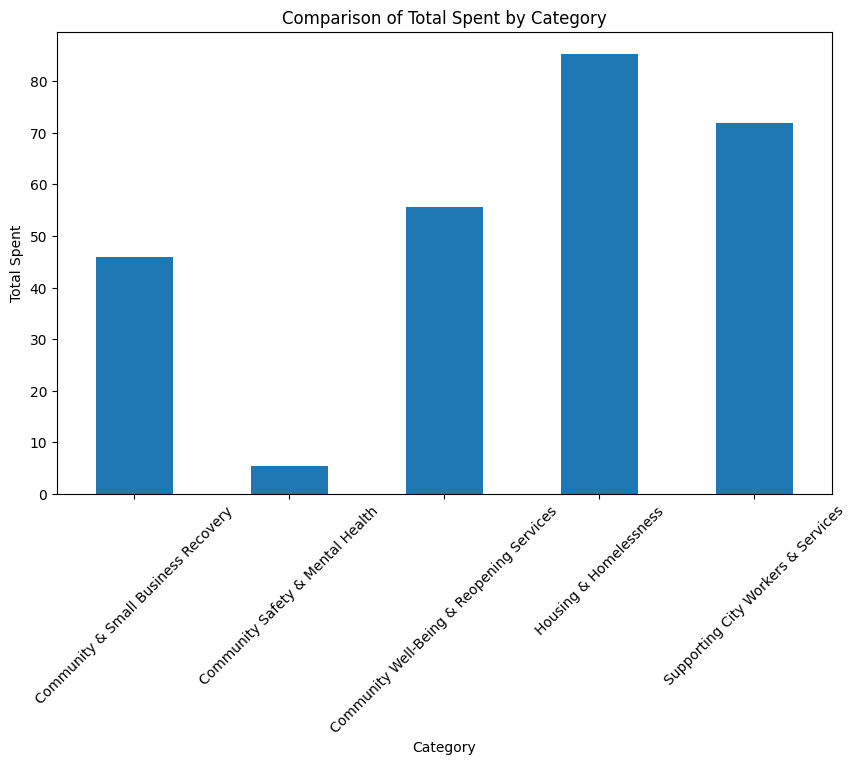

In [55]:

# Create a bar plot
seattle_ag_df['category_sum'].plot(kind='bar', figsize=(10,6))

# Set x-tick labels as the category names
plt.xticks(ticks=range(len(seattle_ag_df)), labels=seattle_ag_df.index, rotation=45)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Total Spent (Millions of Dollars)')
plt.title('Comparison of Total Spent by Category')

# Show the plot
plt.show()


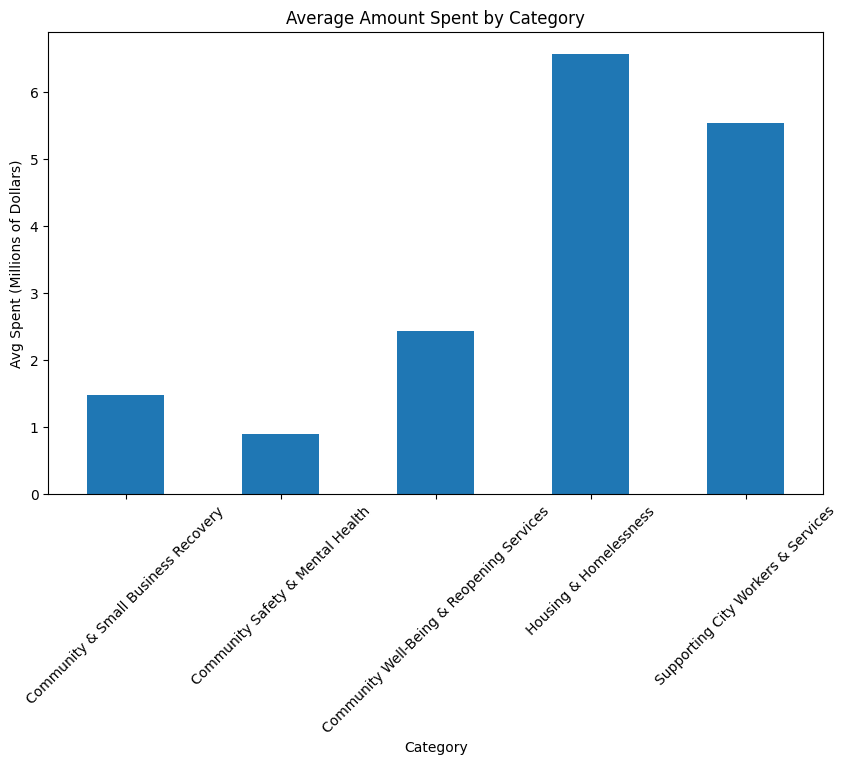

In [56]:

# Create a bar plot
seattle_ag_df['category_avg'].plot(kind='bar', figsize=(10,6))

# Set x-tick labels as the category names
plt.xticks(ticks=range(len(seattle_ag_df)), labels=seattle_ag_df.index, rotation=45)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Avg Spent (Millions of Dollars)')
plt.title('Average Amount Spent by Category')

# Show the plot
plt.show()
